In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot= True)

/Users/yunsungsong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
num_steps = 50000
batch_size = 128
learning_rate = 0.0005
image_dim = 784
gen_hidden_dim = 256
disc_hidden_dim = 256
noise_dim = 100

In [3]:
def he_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.)) 

weights = {
    'gen_hidden1': tf.Variable(he_init([noise_dim, gen_hidden_dim])),
    'gen_out' : tf.Variable(he_init([gen_hidden_dim, image_dim])),
    'disc_hidden1' : tf.Variable(he_init([image_dim, disc_hidden_dim])),
    'disc_out' : tf.Variable(he_init([disc_hidden_dim,1]))
}

biases = {
    'gen_hidden1' : tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out': tf.Variable(tf.zeros([image_dim])),
    'disc_hidden1' : tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out' : tf.Variable(tf.zeros([1]))
}

In [4]:
def generator(x):
    hidden_layer = tf.matmul(x, weights['gen_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['gen_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    output_layer = tf.matmul(hidden_layer, weights['gen_out'])
    output_layer = tf.add(output_layer, biases['gen_out'])
    output_layer = tf.nn.sigmoid(output_layer)
    return output_layer

def discriminator(x):
    hidden_layer = tf.matmul(x, weights['disc_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['disc_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    output_layer = tf.matmul(hidden_layer, weights['disc_out'])
    output_layer = tf.add(output_layer, biases['disc_out'])
    output_layer = tf.nn.sigmoid(output_layer)
    return output_layer   

In [5]:
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input) # Real 데이터를 받는 애랑
disc_fake = discriminator(gen_sample) # Facke 이미지를 받는 애 두개

gen_loss = -tf.reduce_mean(tf.log(disc_fake))
# 밑에 식이 log(D(x))+log(1-D(G(x)))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1.- disc_fake))

optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

gen_vars = [weights['gen_hidden1'], weights['gen_out'],
           biases['gen_hidden1'], biases['gen_out']]
disc_vars = [weights['disc_hidden1'], weights['disc_out'],
           biases['disc_hidden1'], biases['disc_out']]

train_gen = optimizer_gen.minimize(gen_loss, var_list = gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list = disc_vars)

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(num_steps):
    batch_xs, _ = mnist.train.next_batch(batch_size) # disc의 인풋
    z = np.random.uniform(-1.,1.,size=[batch_size, noise_dim]) # gen 인풋
    _, _, gl, dl = sess.run([train_gen,train_disc,gen_loss, disc_loss],
                        feed_dict={disc_input:batch_xs, gen_input:z})
    if i % 100 == 0:
        print("Step:",i,"G Loss:",gl,"D Loss:",dl)
# Margin Maximize Problem

Step: 0 G Loss: 0.3623135 D Loss: 1.7493637
Step: 100 G Loss: 3.5447788 D Loss: 0.11857684
Step: 200 G Loss: 3.695674 D Loss: 0.12719433
Step: 300 G Loss: 4.0030093 D Loss: 0.06117863
Step: 400 G Loss: 4.710785 D Loss: 0.02483861
Step: 500 G Loss: 5.4565697 D Loss: 0.011083235
Step: 600 G Loss: 5.5519915 D Loss: 0.010511437
Step: 700 G Loss: 5.411358 D Loss: 0.015714891
Step: 800 G Loss: 5.463275 D Loss: 0.012377426
Step: 900 G Loss: 6.077099 D Loss: 0.015706593
Step: 1000 G Loss: 6.188537 D Loss: 0.0060788454
Step: 1100 G Loss: 6.4578667 D Loss: 0.00487574
Step: 1200 G Loss: 6.591671 D Loss: 0.0072310166
Step: 1300 G Loss: 6.666686 D Loss: 0.007877989
Step: 1400 G Loss: 7.135849 D Loss: 0.0072918255
Step: 1500 G Loss: 6.869584 D Loss: 0.0038587046
Step: 1600 G Loss: 6.1962137 D Loss: 0.0088597145
Step: 1700 G Loss: 5.198474 D Loss: 0.012809424
Step: 1800 G Loss: 5.408263 D Loss: 0.0168673
Step: 1900 G Loss: 5.680747 D Loss: 0.023619436
Step: 2000 G Loss: 5.4302254 D Loss: 0.014423102


Step: 17200 G Loss: 2.3232188 D Loss: 0.48257166
Step: 17300 G Loss: 2.8581119 D Loss: 0.38946456
Step: 17400 G Loss: 2.5323453 D Loss: 0.463051
Step: 17500 G Loss: 2.591256 D Loss: 0.3556836
Step: 17600 G Loss: 2.6296234 D Loss: 0.45136335
Step: 17700 G Loss: 2.7122898 D Loss: 0.4108892
Step: 17800 G Loss: 3.009306 D Loss: 0.32220966
Step: 17900 G Loss: 2.6045156 D Loss: 0.463307
Step: 18000 G Loss: 2.6675017 D Loss: 0.44081044
Step: 18100 G Loss: 2.5591695 D Loss: 0.36537153
Step: 18200 G Loss: 2.9208136 D Loss: 0.28868008
Step: 18300 G Loss: 3.1841474 D Loss: 0.3209495
Step: 18400 G Loss: 2.531371 D Loss: 0.37257102
Step: 18500 G Loss: 2.8444097 D Loss: 0.45493954
Step: 18600 G Loss: 2.7670035 D Loss: 0.535311
Step: 18700 G Loss: 2.6722667 D Loss: 0.4612094
Step: 18800 G Loss: 2.67837 D Loss: 0.45212013
Step: 18900 G Loss: 2.9078026 D Loss: 0.45188725
Step: 19000 G Loss: 2.9245849 D Loss: 0.4748307
Step: 19100 G Loss: 2.9272642 D Loss: 0.35284483
Step: 19200 G Loss: 2.7277727 D Loss

Step: 34200 G Loss: 2.5433555 D Loss: 0.5577307
Step: 34300 G Loss: 2.5252542 D Loss: 0.423724
Step: 34400 G Loss: 2.5446954 D Loss: 0.3986746
Step: 34500 G Loss: 2.7892222 D Loss: 0.3315689
Step: 34600 G Loss: 2.842145 D Loss: 0.3930379
Step: 34700 G Loss: 2.9149578 D Loss: 0.34250572
Step: 34800 G Loss: 2.4405365 D Loss: 0.38752344
Step: 34900 G Loss: 3.1696386 D Loss: 0.445068
Step: 35000 G Loss: 2.8052528 D Loss: 0.3292896
Step: 35100 G Loss: 3.0951517 D Loss: 0.37895933
Step: 35200 G Loss: 2.636194 D Loss: 0.38612002
Step: 35300 G Loss: 2.8091407 D Loss: 0.26109612
Step: 35400 G Loss: 2.9216099 D Loss: 0.43572924
Step: 35500 G Loss: 3.0201182 D Loss: 0.31403202
Step: 35600 G Loss: 2.6314 D Loss: 0.3804971
Step: 35700 G Loss: 2.807108 D Loss: 0.4116727
Step: 35800 G Loss: 2.797012 D Loss: 0.36390263
Step: 35900 G Loss: 2.9869437 D Loss: 0.4203704
Step: 36000 G Loss: 2.9989595 D Loss: 0.48926532
Step: 36100 G Loss: 2.582711 D Loss: 0.30124366
Step: 36200 G Loss: 2.4970767 D Loss: 0.

/Users/yunsungsong/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


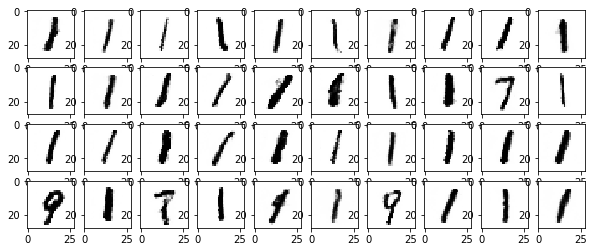

In [7]:
f, a = plt.subplots(4, 10, figsize=(10, 4))
for i in range(10):
    # Noise input.
    z = np.random.uniform(-1., 1., size=[4, noise_dim])
    g = sess.run([gen_sample], feed_dict={gen_input: z})
    g = np.reshape(g, newshape=(4, 28, 28, 1))
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(4):
        # Generate image from noise. Extend to 3 channels for matplot figure.
        img = np.reshape(np.repeat(g[j][:, :, np.newaxis], 3, axis=2),
                        newshape=(28, 28, 3))
        a[j][i].imshow(img)

f.show()